### K-최근접 이웃 회귀 알고리즘

#### k-최근접 이웃 회귀
- 회귀(regression) : 특정한 입력변수 값을 사용하여 출력변수의 값을 계산하는 것을 예측(prediction)문제라고 한다. 예측문제 중에서 출력변수의 값이 연속값인 문제를 회귀(regression) 또는 회귀분석(regression analysis)라고 부른다.
- KNN Regression(K-최근접 이웃 회귀)알고리즘 ㅣ 주변의 가장 가까운 k개의 샘플을 통해 값을 예측하는 방식으로 가장 간단한 방식으로는 K개 샘플의 평균을 이용할 수 있다.

#### 생선무게 예측

In [2]:

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 
                         19.6, 20.0, 21.0,21.0, 21.0, 21.3, 22.0, 22.0, 
                         22.0, 22.0, 22.0, 22.5, 22.5, 22.7,23.0, 23.5, 
                         24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5,
                         27.5,27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                         36.5, 36.0, 37.0, 37.0,39.0, 39.0, 39.0, 40.0, 
                         40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0,
                         85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0,
                         120.0, 130.0, 135.0, 110.0, 130.0,150.0, 145.0,
                         150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0,
                         320.0, 514.0,556.0, 840.0, 685.0, 700.0, 700.0, 
                         690.0, 900.0, 650.0, 820.0,850.0, 900.0, 1015.0,
                         820.0, 1100.0, 1000.0, 1100.0, 1000.0,1000.0])

##### 분류 및 예측을 위한 모델
1. Model_based Learning(모델 기반 학습)
- 데이터로 부터 모델을 생성하여 분류/예측을 진행한다.
- 선형/비선형 모델(Liner regression, logistic regression)
- Neural Network
- 의사결정나무(desision tree)
- SVM(support vector machine)
2. Instance_based Learning(사례 기반 학습)
- 별도의 모델 생성없이 데이터 베이스에 있는 자료들을 분류/예측에 사용한다.
- 각각의 관측치만을 이용하여 새로운 데이터에 대한 예측을 진행한다.
- 대표적인 알고리즘을 knn알고리즘 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


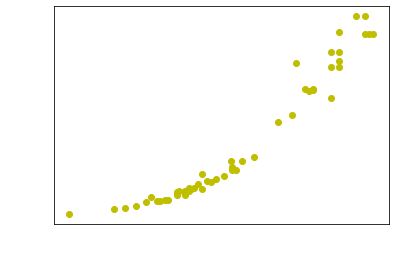

In [3]:
# 데이터 특성 파악을 위한 산점도 그래프
plt.scatter(perch_length, perch_weight, color = 'y')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
## 선형관계가 있다고 볼수 있고, 길이가 늘어날 때, 무게도 늘어난다. 변수관의 관련성이 有
## 회귀 분석을 사용할 수 있다.

In [ ]:
# 피어슨 0.3~0.5 상관관계 있다. 0.5~0.8 아주 강한 상과관계가 있다. 

#### 훈련데이터세트와 테스트데이터세트 분리

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state=42)

In [7]:
a = np.array([1,2,3,4])
a.shape

(4,)

In [6]:
a = np.array([1,2,3,4]).reshape(2,2) # 차원이 변경돼도 요소수는 같아야함.
a.shape

(2, 2)

In [10]:
a = a.reshape(2,-1) # -1을 넣으면 2차원을 만들겠다는 거, 열 무시
a.shape

(2, 2)

In [8]:
# 머신을 돌리기 위해서는 2차원이 되어야함
train_input = train_input.reshape(-1,1) # 행 무시, 
test_input = test_input.reshape(-1,1)

In [12]:
train_input.shape, test_input.shape

((42, 1), (14, 1))

In [13]:
# 회귀 모델 돌리기
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor() # k값 생략
knr.fit(train_input, train_target)

KNeighborsRegressor()

##### Machine Learning Package Version List

In [14]:
import sys
print('파이썬: ',sys.version)

파이썬:  3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [16]:
print('판다스:', pd.__version__)

판다스: 1.3.4


In [17]:
print('넘파이:', np.__version__)

넘파이: 1.20.3


In [20]:
import matplotlib
print('Matplot:', matplotlib.__version__)

Matplot: 3.4.3


In [21]:
import scipy as sp
sp.__version__

'1.7.1'

In [23]:
import IPython
IPython.__version__

'7.29.0'

In [24]:
import sklearn
sklearn.__version__

'0.24.2'

#### 분리된 데이터 작업

In [25]:
# 정확도 : 정답을 맞춘 개수의 비율
## test데이터의 정확도
knr.score(test_input, test_target)

0.992809406101064

In [26]:
# 결정계수(R2) = 1-(타깃 - 예측)^2 의 합 / (타깃 - 평균)^2의 합
from sklearn.metrics import mean_absolute_error
# MAE : 타깃과 예측의 절대값 오차를 평균하여 반환
# 테스트 데이터의 예측
test_predict = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_predict)
mae
# 생선의 무게가 평균적으로 타깃 값과 19g정도가 차이나는 걸 알수 있따.

19.157142857142862

In [27]:
# 훈련데이터 결정계수 측정
knr.score(train_input, train_target)

0.9698823289099254

#### 과대적합 vs 과소적합

- 과대적합(overfitting) : 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 나쁠때
- 과소적합(underfitting) : 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 너무 낮은 경우
 - 과소 적합을 해결하는 일반적인 방법은 모델을 더 복잡하게 만드는 것이다.
 - k-최근접 이웃 모델을 복잡하게 만드는 방법은 이웃수 k 값을 낮추는 것이다.

- 일반적으로 과대적합과 과소적합이 발생하는 이유중 하나는 데이터 셋의 크기가 매우 작기 때문이다.

In [29]:
# 테스트의 결정계수가 훈련의 결정계수 보다 점수가 높아서 과소적합을 의심할 수 있다.
# 과소 적합이 의심되면 모델을 복잡하게 만들면 된다. (k값을 낮춘다.)
knr.n_neighbors =3 # default = 5

# 모델 훈련
knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966

In [30]:
knr.score(test_input, test_target)
# 두 계수의 차이가 줄었으니,,
# 이 모델은 생선무게를 예측하기 좋은 모델이다.

0.9746459963987609